# $$\text{Dimensionality Reduction:  what it } \textit{is} \text{ and what it } \textit{is not}$$

$$\text{Schwartz}$$

# This talk will discuss

- the _curse of dimensionality_
- PCA/SVD
- UVD/NMF
- the problem with _multiple testing_
    - _"Multiple testing_" as correctable by dimensionality reduction
    
    
# In doing so, we will emphasize the subtle distinctions between 
- the _curse of dimensionality_
- adequate sample size
- mathematical estimability
- multiple testing

# $$\text{The Curse of Dimensionality} $$ 

## What it is:
- Distance between points in high dimensional space is not meaningful -- everything is _"far away"_
    - The notion of _"neighbors"_ breaks down

## What it is not:
- Linear model regression, e.g., only works with $n > p$ because $(X^T X)^{-1}$ is not invertible otherwise 
    - this is "math" -- not the "curse of dimensionality"
- Linear model regression, e.g., only works well with $n >> p$ because insufficient data results in unstable/idiosyncratic estimation
    - this is a _"sample size"_ or _"signal"_ issue -- not the "curse of dimensionality"

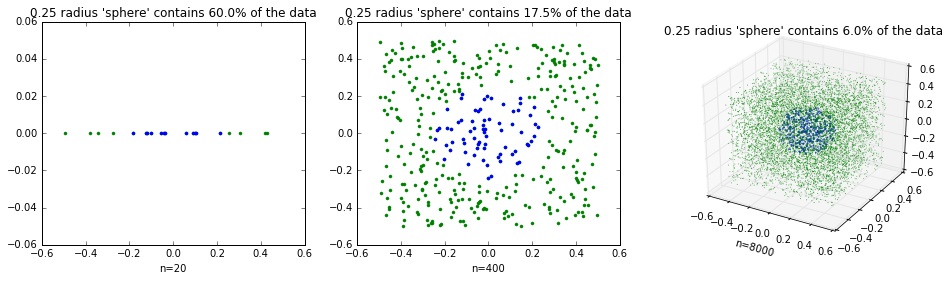

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (16, 4)
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax1 = fig.add_subplot(131)

n=20
rad = .25
x1 = stats.uniform([-.5]).rvs(n)
plt.plot(x1, 0*x1, 'g.')
plt.plot(x1[np.abs(x1)<rad], 0*x1[np.abs(x1)<rad], 'b.')

plt.title(str(rad)+" radius 'sphere' contains "+str(100*round(np.sum(np.abs(x1)<rad)/float(n),2))+"% of the data")
plt.xlabel("n="+str(n))

ax2 = fig.add_subplot(132)

x1 = stats.uniform([-.5]).rvs(n**2)
x2 = stats.uniform([-.5]).rvs(n**2)
plt.plot(x1, x2, 'g.')
plt.plot(x1[np.sqrt(x1**2+x2**2)<rad], x2[np.sqrt(x1**2+x2**2)<rad], 'b.')
plt.title(str(rad)+" radius 'sphere' contains "+str(100*round(np.sum(np.sqrt(x1**2+x2**2)<rad)/float(n**2),3))+"% of the data")
plt.xlabel("n="+str(n**2))

ax3 = fig.add_subplot(133, projection='3d')

x1 = stats.uniform([-.5]).rvs(n**3)
x2 = stats.uniform([-.5]).rvs(n**3)
x3 = stats.uniform([-.5]).rvs(n**3)
ax3.scatter(x1, x2, x3, c='g', s=1, edgecolor="none")
ax3.scatter(x1[np.sqrt(x1**2+x2**2+x3**2)<rad], x2[np.sqrt(x1**2+x2**2+x3**2)<rad], x3[np.sqrt(x1**2+x2**2+x3**2)<rad], c='b', s=3, edgecolor="none")
plt.title(str(rad)+" radius 'sphere' contains "+str(100*round(np.sum(np.sqrt(x1**2+x2**2+x3**2)<rad)/float(n**3),4))+"% of the data")
plt.xlabel("n="+str(n**3))

# In high dimensional space, all the area is off in the "corners" of the space

# So to retain the same relative _"local density"_ requires $>$$n^p$ data points

- Comparably sized sets of _"similar"_ data points requires an increasingly looser notion of similarity as the dimension of the data space increases




# $$ \text{This is the issue of the} \textit{ Curse of Dimensionality}$$
- i.e., the circumstance that _"distance"_ becomes increasingly meaningless as everything gets farther and farther away in increasingly higher dimensions

# $$\text{Change of Basis (Coordinates)} $$ 

# In two-dimensional space
- A single data point tells very little about the distribution of data in the space

# In three-dimensional space
- Two data points likewise tell us very little about the distribution of data in the space

## With more data in these spaces we can begin to understand the _"shape"_ of the data

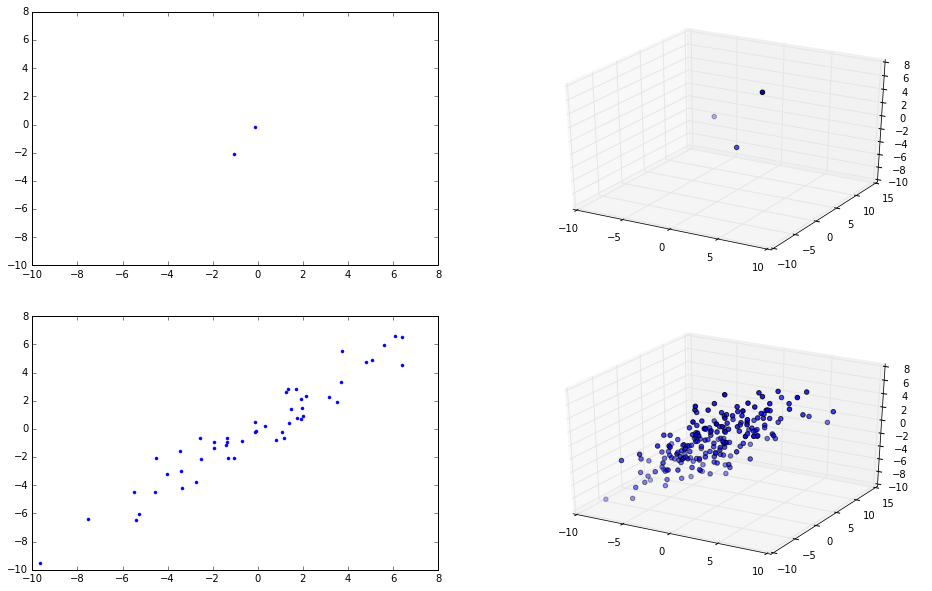

In [4]:
pylab.rcParams['figure.figsize'] = (16, 10)

fig = plt.figure()

n=50
X = stats.multivariate_normal(np.array([0,0]), np.array([[10,9.5],[9.5,10]])).rvs(n)

ax1 = fig.add_subplot(221)
ax1.plot(X[:,0], X[:,1], 'w.')
ax1.plot(X[:2,0], X[:2,1], 'b.')

ax3 = fig.add_subplot(223)
ax3.plot(X[:,0], X[:,1], 'b.')

n=200
X = stats.multivariate_normal(np.array([0,0,0]), np.array([[10,9,7],[9,10,7],[7,7,10]])).rvs(n)

ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(X[:,0], X[:,1], X[:,2], s=0)
ax2.scatter(X[:3,0], X[:3,1], X[:3,2])

ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(X[:,0], X[:,1], X[:,2])

# $$ \text{This is the issue of the} \textit{ Adequate Sample Size}$$ 

- Without sufficient sample size to allow reproducible estimation of the target of interest, no reliable inference is possible

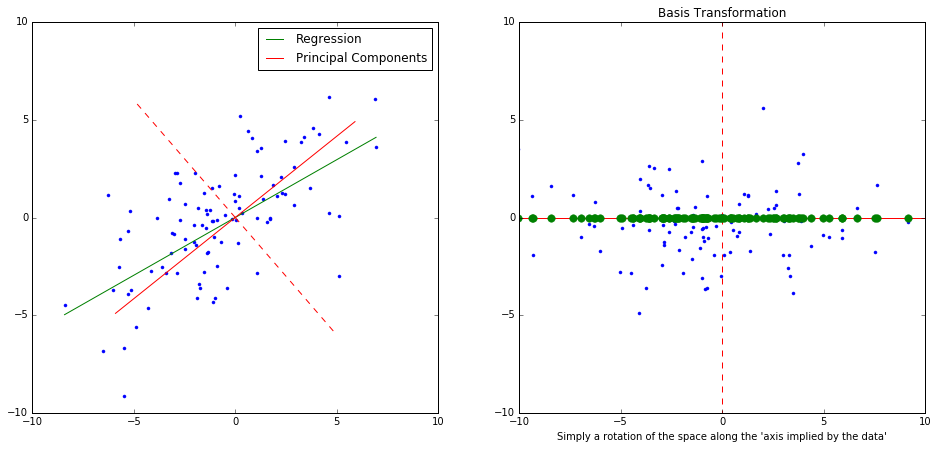

In [5]:
pylab.rcParams['figure.figsize'] = (16, 7)

fig = plt.figure()

n=100
X = stats.multivariate_normal(np.array([0,0]), np.array([[10,7],[7,10]])).rvs(n)

ax1 = fig.add_subplot(121)
ax1.plot(X[:,0], X[:,1], 'b.')

slope = np.corrcoef(X[:,0], X[:,1])[0,1]*np.std(X[:,1], ddof=1)/np.std(X[:,0], ddof=1)
ax1.plot([np.min(X[:,0]), np.max(X[:,0])], [np.min(X[:,0])*slope, np.max(X[:,0])*slope], c='g', label="Regression")

U, s, V = np.linalg.svd(X)

stretch = .5*(np.max(X[:,0])-np.min(X[:,0]))
ax1.plot([0,stretch*V[0,0]], [0,stretch*V[0,1]], 'r', label="Principal Components")
ax1.plot([0,-stretch*V[0,0]], [0,-stretch*V[0,1]], 'r')
ax1.plot([0,stretch*V[1,0]], [0,stretch*V[1,1]], 'r--')
ax1.plot([0,-stretch*V[1,0]], [0,-stretch*V[1,1]], 'r--')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.legend(loc="best")

# show (a) regression and (b) PCA lines

#PCs = U.dot(s)

ax2 = fig.add_subplot(122)
ax2.plot(U[:,0]*s[0], U[:,1]*s[1], 'b.')
ax2.plot([0,10], [0,0], 'r')
ax2.plot([0,-10], [0,0], 'r')
ax2.plot([0,0], [0,10], 'r--')
ax2.plot([0,0], [0,-10], 'r--')
plt.xlim([-10,10])
plt.ylim([-10,10])
ax2.plot(U[:,0]*s[0], 0*U[:,0], 'g.', ms=15)
plt.title("Basis Transformation")
plt.xlabel("Simply a rotation of the space along the 'axis implied by the data'")

## With sufficient data we can change into coordinates better reflecting data _"shape"_

## This is slightly different than _linear model regression_
- which aims to maximize overall prediciton accuracy as opposed to give an improved and more natural data representation

## This _"data shape"_ representation is called Principal Components Analysis (PCA) 
- It's effectiveness depends on how well the _"data cloud"_ is characterized within the space
- And of course it does not provide a unique solution (i.e., it fails) if $p>n$

# $$ \text{Dimensionality Reduction} $$

# _Dimensionality Reduction_ is acheived by keeping the most relevant data axes
- We can drop axes that capture very little of the overall variation of the data cloud
- The total variation of the data can be partitioned across these axes, so we can decide how much variation to retain

(0, 1)

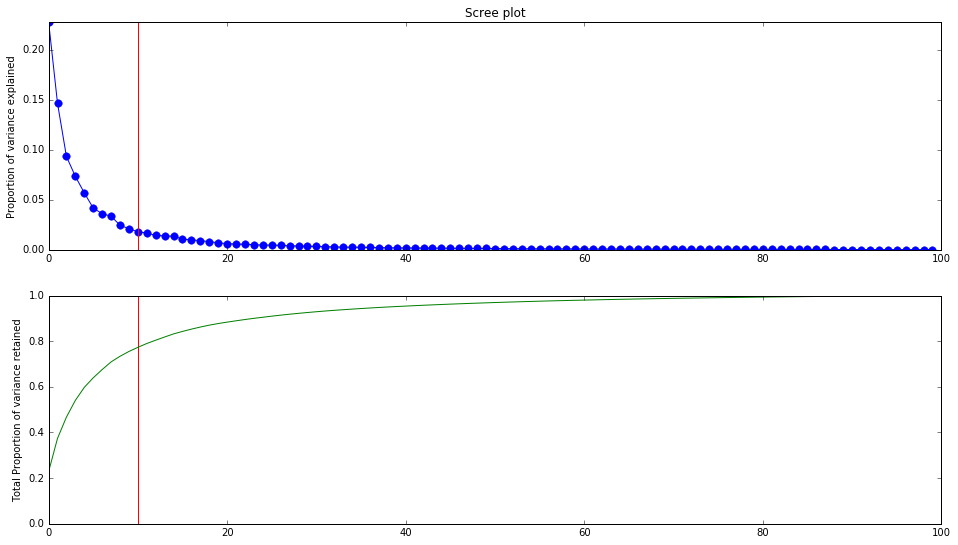

In [6]:
Cov = stats.invwishart.rvs(df=110, scale=np.diag(100*[10]))
evs = np.sort(np.linalg.eig(Cov)[0])

pylab.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax1 = fig.add_subplot(211)

plt.plot(evs[::-1]/np.sum(evs))
plt.plot(evs[::-1]/np.sum(evs), 'b.', ms=15)
plt.title("Scree plot")
plt.ylabel("Proportion of variance explained")
plt.plot([10,10],[0,np.max(evs)/np.sum(evs)], 'r')
plt.ylim([0,np.max(evs)/np.sum(evs)])

ax2 = fig.add_subplot(212)

plt.plot([10,10], [0,1], 'r')
plt.plot(np.cumsum(evs[::-1]/np.sum(evs)), 'g')
plt.ylabel("Total Proportion of variance retained")
plt.ylim([0,1])

# $$ 
\begin{align}
\left[\begin{array}{cccc} x_{11} & x_{12} & \cdots & x_{1p} \\
x_{21} & x_{22} & \cdots & x_{2p} \\
\vdots & \vdots & \vdots & \vdots \\
\\
\\
\vdots & \vdots & \vdots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{np} \\ 
\end{array} \right] \quad = \;\; & {}  \color{red}{\tiny \begin{array}{c}P\\[-10pt]r\\[-10pt]i\\[-10pt]n\\[-10pt]c\\[-10pt]i\\[-10pt]p\\[-10pt]a\\[-10pt]l\end{array}
\begin{array}{c}C\\[-10pt]o\\[-10pt]m\\[-10pt]p\\[-10pt]o\\[-10pt]n\\[-10pt]e\\[-10pt]n\\[-10pt]t\\[-10pt]s\end{array}
\begin{array}{c}|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt] \Bigg\downarrow \end{array}}
\left[\begin{array}{cccc} t_{11} & t_{12} & \cdots & t_{1p} \\
t_{21} & t_{22} & \cdots & t_{2p} \\
\vdots & \vdots & \vdots & \vdots \\
\\
\\
\vdots & \vdots & \vdots & \vdots \\
t_{n1} & t_{n2} & \cdots & t_{np} \\ 
\end{array} \right]
\overset{\color{red}{Eigenvectors}}{\overset{\color{red}{-----------\longrightarrow}}{\left[\begin{array}{cccc} ev_{11} & \cdots & ev_{1p} \\
ev_{21} & \cdots & ev_{2p} \\
\vdots & \vdots & \vdots  \\
\\
ev_{p1} & \cdots & ev_{pp} \\ 
\end{array} \right]}}
\\
\\
& {} \color{blue}{\text{Dimensionality Reduction: Reduced Representation}}\\
\left[\begin{array}{cccc} \hat x_{11} & \hat x_{12} & \cdots & \hat x_{1p} \\
\hat x_{21} & \hat x_{22} & \cdots & \hat x_{2p} \\
\vdots & \vdots & \vdots & \vdots \\
\\
\\
\vdots & \vdots & \vdots & \vdots \\
\hat x_{n1} & \hat x_{n2} & \cdots & \hat x_{np} \\ 
\end{array} \right] \quad \overset{e.g.}{\approx {}} \;\; & {} \color{red}{\tiny \begin{array}{c}P\\[-10pt]r\\[-10pt]i\\[-10pt]n\\[-10pt]c\\[-10pt]i\\[-10pt]p\\[-10pt]a\\[-10pt]l\end{array}
\begin{array}{c}C\\[-10pt]o\\[-10pt]m\\[-10pt]p\\[-10pt]o\\[-10pt]n\\[-10pt]e\\[-10pt]n\\[-10pt]t\\[-10pt]s\end{array}
\begin{array}{c}|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt]|\\[-10pt] \Bigg\downarrow \end{array}}
\left[\begin{array}{cc} t_{11} & t_{12} \\
t_{21} & t_{22} \\
\vdots & \vdots \\
\\
\\
\vdots & \vdots \\
t_{n1} & t_{n2} \\ 
\end{array} \right]
\overset{\color{red}{Eigenvectors}}{\overset{\color{red}{-----------\longrightarrow}}{\left[\begin{array}{cccc} ev_{11} & \cdots & ev_{1p} \\
ev_{21} & \cdots & ev_{2p} \\
\end{array} \right]}}\\
& {} \color{red}{\text{You control the proportion of variation retained}}\\
\end{align}
$$

## Many algorithms, and interpretations, can benefit from a lower dimensional feature set
## Often less variable dimensions capture _"noise"_ so reduced representations can be cleaner

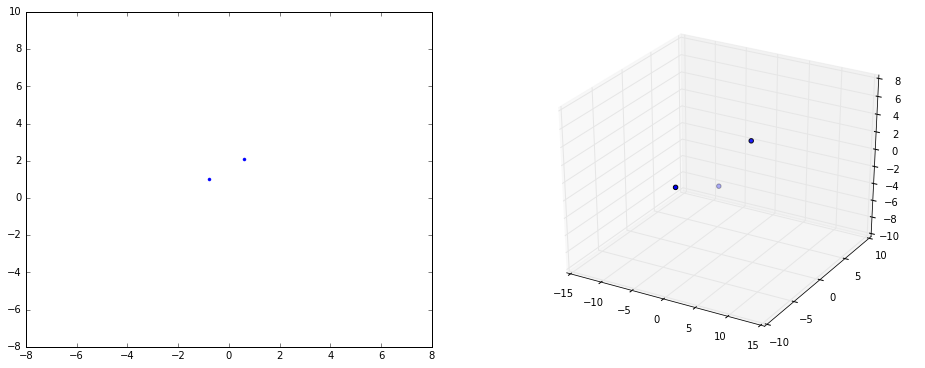

In [227]:
pylab.rcParams['figure.figsize'] = (16, 6)

fig = plt.figure()

n=50
X = stats.multivariate_normal(np.array([0,0]), np.array([[10,9.5],[9.5,10]])).rvs(n)

ax1 = fig.add_subplot(121)
ax1.plot(X[:,0], X[:,1], 'w.')
ax1.plot(X[:2,0], X[:2,1], 'b.')

n=200
X = stats.multivariate_normal(np.array([0,0,0]), np.array([[10,9,7],[9,10,7],[7,7,10]])).rvs(n)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:,0], X[:,1], X[:,2], s=0)
ax2.scatter(X[:3,0], X[:3,1], X[:3,2])

# $$ \text{The $p>n$ Problem} $$ 

# PCA cannot save you from the too little data in too big a space



# $$ \begin{align}
\left[\begin{array}{cccc} x_{11} & x_{12} & \cdots & x_{1p} \\
\vdots & \vdots & \vdots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{np} \\ 
\end{array} \right]
\quad = \;\; & {} \color{red}{\tiny \begin{array}{c}P\\[-10pt]r\\[-10pt]i\\[-10pt]n\\[-10pt]c\\[-10pt]i\\[-10pt]p\\[-10pt]a\\[-10pt]l\end{array}
\begin{array}{c}C\\[-10pt]o\\[-10pt]m\\[-10pt]p\\[-10pt]o\\[-10pt]n\\[-10pt]e\\[-10pt]n\\[-10pt]t\\[-10pt]s\end{array}
\begin{array}{c}|\\[-10pt]|\\[-10pt]|\\[-10pt] \Bigg\downarrow \end{array}}
\left[\begin{array}{cccc} t_{11} & \cdots & t_{1n} & \color{orange}{0\cdots0} \\
\vdots & \vdots & \vdots & \color{orange}{\vdots} \\
 t_{n1} & \cdots & t_{nn} & \color{orange}{0\cdots0} \\
\end{array} \right]
\overset{\color{red}{Eigenvectors}}{\overset{\color{red}{-----------\longrightarrow}}{\left[\begin{array}{cccc} ev_{11} & \cdots & ev_{1p} \\[-10pt]
\vdots & \vdots & \vdots \\[-10pt] 
ev_{n1} & \cdots & ev_{np} \\
\color{orange}{0} & \color{orange}{\cdots} & \color{orange}{0} \\[-10pt] 
 & \color{orange}{\vdots} & \\[-10pt]
\color{orange}{0} & \color{orange}{\cdots} & \color{orange}{0} \\[-10pt] 
\end{array} \right]}}\\
& {} \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;\;\;\; \color{blue}{\text{The rank of}}\\
& {} \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;\; \color{blue}{\text{the eigenvalue}}\\
& {} \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\;\; \color{blue}{\text{matrix is $n<p$}}
\end{align}
$$

# i.e., it can learn a lower dimensional representation of the data

- But this isn't an improved characterization of high dimensional data structure
- It's only a characterization of the subspace defined by the data available
- And this structure is likely _extremely volatile_ and highly susceptible to dataset idiosyncracies


- Alternatively, the least variable features could just be removed... 
- Instead, a rotation and projection into $n<p$ is trying to retain all the variability present in the data

# A generally understood rule is in order to estimate a $p$ parameter model: 

# we need $n>p$ data points

# $$ \text{This is the issue of the} \textit{ Mathematical Estimability}$$ 

- There is model fit uncertainty/unreliability, and then there is when something is **mathematically unidentified**... i.e., it completely breaks...

# $$ \text{More Decompositions: SVD, UVD, and NMF} $$

# Singular Value Decomposition (SVD) actually is the same as PCA

- It's just a more numerically efficient algorithm that directly decomposes the data matrix
- It does not need to compute the covariance matrix or eigenvalues therein as is PCA's computational method

# Se we of course can also do _dimensionality reduction_ with SVD

<table style="width:100%">
  <tr>
    <th><img src="dr_stuff/svd_a.png" height="350px" align="left"></th>
    <th></th> 
    <th><img src="dr_stuff/svd_b.png" height="350px" align="left">
    
    <br>
    &nbsp;
    <br>
    &nbsp;
    <br>
    &nbsp;
    <br>
    &nbsp;
    <br>
    &nbsp;
    <br>
    &nbsp;
    <br>
    &nbsp;
    <br>
    &nbsp;
    <br>
    &nbsp;
    <br>
    &nbsp;

    </th>
  </tr>
</table>

# UV-Decomposition (UVD) and Non-Negative Matrix Factorization (NMF) 

### Alternative factorizations with similar capabilities as SVD/PCA -- NMF restricts all entries to be positive 

- NMF has a nice _"cake mixing"_ interpretation -- SVD/PCA/UVD simply have a _"linear combinations"_ interpretation


<table style="width:100%">
  <tr>
    <th><img src="dr_stuff/uv_a.png" height="350px" align="left"></th>
    <th></th> 
    <th><img src="dr_stuff/uv_b.png" height="350px" align="left">
    </th>
  </tr>
</table>


# The _"latent features"_ interpretation of these matrix factorizations is attractive

# $$ \text{Relationship to Multiple Testing} $$
- Centering and Scaling is routinely recommended for PCA/SVD so that feature variance doesn't bias eigenvector directions
    - e.g., if all features are "created equal", then a new basis representation should not bias for certain features
- Sometimes, however, feature variance is indicative of signal, with less variable features have less information -- or actually being "more noisy"
- _So scaling would actually emphesize the poorer measurements in these cases!_


- In cases where multiple features are trying to measure the same thing, we have a situation akin to multiple testing
- And the problem is the same: each time you measure you have the chance to be wrong
    - _(classical multiple testing usually is not about trying to measure the **same thing** multiple times -- just many **different things**)_ 


- Reducing the number of tests is very advantageous to removing false positives from testing outcomes
- Similarly, using, e.g., an unnormalized PCA provides a weighted average of all measurements into a single measurement 
    - Presumably a more precise measurement as a result of stabilizing aggregation
    - And just a single measurement, to boot!  So no multiple testing!